 8. We will now perform cross-validation on a simulated data set.

 (a) Generate a simulated data set as follows:

 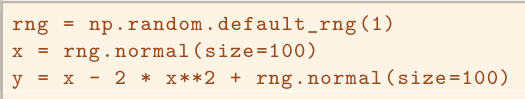

  In this data set, what is n and what is p? Write out the model
 used to generate the data in equation form.

In [1]:
import numpy as np

# Set up the random number generator
rng = np.random.default_rng(1)

# Generate x from a normal distribution
x = rng.normal(size=100)

# Generate y based on the given model
y = x - 2 * x**2 + rng.normal(size=100)

# Display the first few values of x and y to verify
print("x:", x[:5])
print("y:", y[:5])


x: [ 0.34558419  0.82161814  0.33043708 -1.30315723  0.90535587]
y: [-0.54455369  0.33395019 -0.01353233 -4.03044153  0.48486098]


- n（觀測值的數量）為 100，因為資料是根據 size=100 生成的。
- p（自變量的數量）為 1，因為在生成 y 時只使用了一個自變量 x。

Model：
y = x − 2x + ϵ

 (b) Create a scatterplot of X against Y . Comment on what you find.

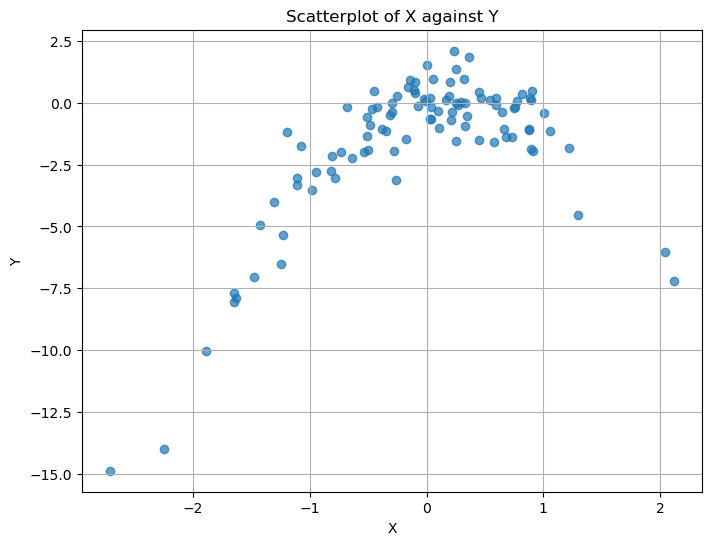

In [2]:
import matplotlib.pyplot as plt

# Create a scatterplot of X against Y
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot of X against Y")
plt.grid(True)
plt.show()


 (c) Set a random seed, and then compute the LOOCV errors that
 result from fitting the following four models using least squares:

 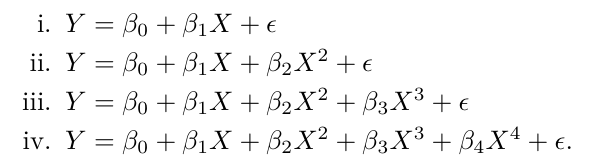

  Note you may find it helpful to use the data.frame() function
 to create a single data set containing both X and Y .

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import pandas as pd


# Convert x to a dataframe for easier feature management
X = x.reshape(-1, 1)
data = pd.DataFrame({'X': x, 'Y': y})

# Define a function to calculate LOOCV error for a given polynomial degree
def loocv_error(degree):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    loo = LeaveOneOut()
    model = LinearRegression()
    errors = []
    
    for train_index, test_index in loo.split(X_poly):
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        errors.append(mean_squared_error(y_test, y_pred))
        
    return np.mean(errors)

# Calculate LOOCV errors for models of degree 1 to 4
loocv_errors = {f"Model degree {i}": loocv_error(i) for i in range(1, 5)}
loocv_errors


c:\Users\sabri\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


{'Model degree 1': 6.633029839181983,
 'Model degree 2': 1.1229368563419693,
 'Model degree 3': 1.3017965489358863,
 'Model degree 4': 1.3323942694179343}

 (d) Repeat (c) using another random seed, and report your results.
 Are your results the same as what you got in (c)? Why?

In [4]:
# Set a different random seed for reproducibility
rng = np.random.default_rng(42)

# Generate the dataset again with the new seed
x_new = rng.normal(size=100)
y_new = x_new - 2 * x_new**2 + rng.normal(size=100)

# Convert x_new to a dataframe for easier feature management
X_new = x_new.reshape(-1, 1)

# Define a function to calculate LOOCV error for a given polynomial degree using new data
def loocv_error_new(degree):
    poly = PolynomialFeatures(degree)
    X_poly_new = poly.fit_transform(X_new)
    loo = LeaveOneOut()
    model = LinearRegression()
    errors = []
    
    for train_index, test_index in loo.split(X_poly_new):
        X_train, X_test = X_poly_new[train_index], X_poly_new[test_index]
        y_train, y_test = y_new[train_index], y_new[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        errors.append(mean_squared_error(y_test, y_pred))
        
    return np.mean(errors)

# Calculate LOOCV errors for models of degree 1 to 4 using new data
loocv_errors_new = {f"Model degree {i}": loocv_error_new(i) for i in range(1, 5)}
loocv_errors_new


{'Model degree 1': 4.2518828656027745,
 'Model degree 2': 0.9639984632709351,
 'Model degree 3': 0.9912711879229299,
 'Model degree 4': 1.018180104380912}

因為random seed不同導致資料中的樣本不同使LOOCV 不一樣，但quadratic model表現一樣是最佳

 (e) Which of the models in (c) had the smallest LOOCV error? Is
 this what you expected? Explain your answer.

二次模型（degree 2） 的 LOOCV 誤差最小，約為 1.1229，因為生成 y 的真實關係式是一個關於 x 的二次函數，所以如預期的二次模型有最佳表現

 (f) Comment on the statistical significance of the coefficient esti
mates that results from fitting each of the models in (c) using
 least squares. Do these results agree with the conclusions drawn
 based on the cross-validation results?

In [6]:
import statsmodels.api as sm

# Function to fit models and display statistical significance of coefficients
def fit_model_and_get_summary(degree, X, y):
    # Create polynomial features up to the given degree
    poly = PolynomialFeatures(degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    
    # Fit the model using statsmodels for detailed output
    X_poly = sm.add_constant(X_poly)  # Add intercept term
    model = sm.OLS(y, X_poly).fit()
    return model.summary()

# Fit models of degree 1 to 4 and display summaries
model_summaries = {f"Model degree {1}": fit_model_and_get_summary(1, X, y)}

model_summaries


{'Model degree 1': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                      y   R-squared:                       0.318
 Model:                            OLS   Adj. R-squared:                  0.311
 Method:                 Least Squares   F-statistic:                     45.60
 Date:                Tue, 05 Nov 2024   Prob (F-statistic):           1.04e-09
 Time:                        16:38:28   Log-Likelihood:                -230.83
 No. Observations:                 100   AIC:                             465.7
 Df Residuals:                      98   BIC:                             470.9
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------

In [7]:
model_summaries = {f"Model degree {2}": fit_model_and_get_summary(2, X, y)}

model_summaries

{'Model degree 2': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                      y   R-squared:                       0.887
 Model:                            OLS   Adj. R-squared:                  0.884
 Method:                 Least Squares   F-statistic:                     379.5
 Date:                Tue, 05 Nov 2024   Prob (F-statistic):           1.36e-46
 Time:                        16:38:37   Log-Likelihood:                -141.06
 No. Observations:                 100   AIC:                             288.1
 Df Residuals:                      97   BIC:                             295.9
 Df Model:                           2                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------

In [8]:
model_summaries = {f"Model degree {3}": fit_model_and_get_summary(3, X, y)}

model_summaries

{'Model degree 3': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                      y   R-squared:                       0.888
 Model:                            OLS   Adj. R-squared:                  0.885
 Method:                 Least Squares   F-statistic:                     253.8
 Date:                Tue, 05 Nov 2024   Prob (F-statistic):           1.70e-45
 Time:                        16:38:47   Log-Likelihood:                -140.47
 No. Observations:                 100   AIC:                             288.9
 Df Residuals:                      96   BIC:                             299.4
 Df Model:                           3                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------

In [9]:
model_summaries = {f"Model degree {4}": fit_model_and_get_summary(4, X, y)}

model_summaries

{'Model degree 4': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                      y   R-squared:                       0.894
 Model:                            OLS   Adj. R-squared:                  0.890
 Method:                 Least Squares   F-statistic:                     200.2
 Date:                Tue, 05 Nov 2024   Prob (F-statistic):           2.22e-45
 Time:                        16:38:58   Log-Likelihood:                -137.74
 No. Observations:                 100   AIC:                             285.5
 Df Residuals:                      95   BIC:                             298.5
 Df Model:                           4                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------

每個模型中係數的統計顯著性應該與交叉驗證結果一致。二次模型（degree 2）具有最低的 LOOCV 誤差，並且預期線性和二次項的係數會顯著，符合真實的資料的模式。三次和四次模型中的高階項應該不顯著，也反映在統計顯著性，並也與LOOCV結果一致